In [1]:
include("../bayesianGP.jl")
using Gen
using Plots

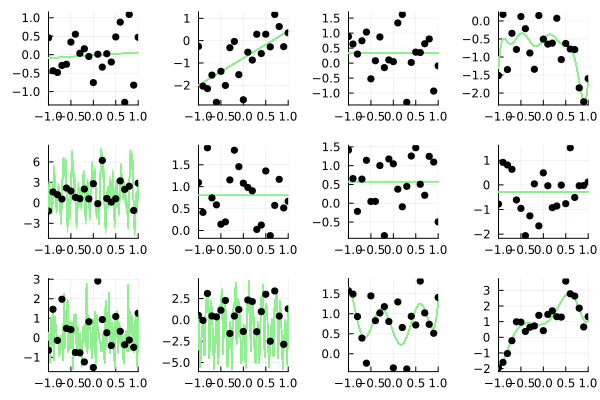

In [2]:
function visualize_gp_trace(tr, xmin, xmax; title="")
    curveXs = collect(Float64, range(xmin, length=100, stop=xmax))
    data_xs, = get_args(tr)
    data_ys = tr[:ys]
    curveYs = [predict_ys(get_retval(tr), 0.000001, data_xs, data_ys, curveXs) for i=1:50]
    fig = plot()
    for (i, curveYSet) in enumerate(curveYs)
        plot!(curveXs, curveYSet, title=title, xlims=(xmin, xmax), label=nothing, color="lightgreen")
    end
    scatter!(data_xs, data_ys, color="black", label=nothing)
end

traces = [first(generate(model, (collect(Float64, -1:0.1:1),))) for i in 1:12]
plot([visualize_gp_trace(t, -1, 1) for t in traces]...)